<a href="https://colab.research.google.com/github/ritwiks9635/Data-Science-Project/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression Model**

[Salary Dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)

In [ ]:
!unzip /content/https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/salary-dataset-simple-linear-regression.zip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Salary_dataset.csv")
data.drop(["Unnamed: 0"], axis = 1, inplace=True)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


**Visualize the Relationship between Year of Experience and Salary**

Correlation between Years of Experience and Salary: 0.98


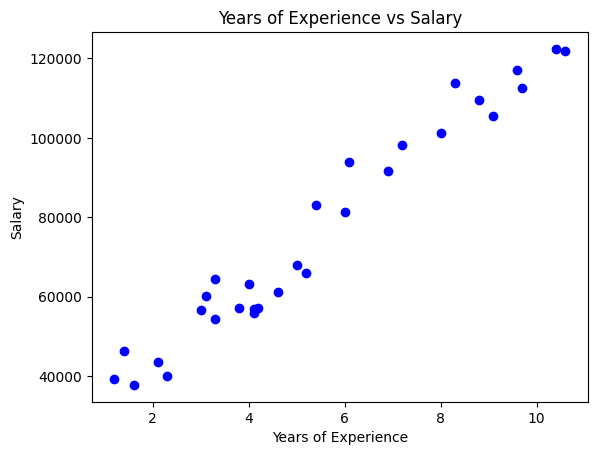

In [5]:
correlation = data['YearsExperience'].corr(data['Salary'])
print(f'Correlation between Years of Experience and Salary: {correlation:.2f}')

# Plot Years of Experience vs. Salary
plt.scatter(data['YearsExperience'], data['Salary'], color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [9]:
X = data["YearsExperience"].values
y = data["Salary"].values

**Hypothesis Function ::** $$ \hat{y} = w \cdot x + b $$

**Compute Cost ::** $$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2 $$

In [13]:
def compute_cost(x, y, w, b):
    m = len(x) # Number of training samples
    total_cost = 0
    for i in range(m):
        pred = w * x[i] + b # compute the prediction of the model
        cost = (pred - y[i]) ** 2 # compute the cost
        total_cost += cost # add cost

    total_cost /= (2 * m) # divide the total cost by twice the number training samples
    return total_cost

**Gradient of Weight ::** $$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) \cdot x_i $$

**Gradient of Bias ::** $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) $$

In [14]:
def compute_gradient(x, y, w, b):
    m = len(x)
    # the gradient of the cost w, b
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        pred = w * x[i] + b
        # compute gradient for parameter w
        dj_dw += (pred - y[i]) * x[i]
        # compute gradient for parameter b
        dj_db += pred - y[i]

    # Divide the gradient by the number of training samples
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

**Update value of parameters Weights and Bias ::**

$$ w = w - \alpha \cdot \frac{\partial J}{\partial w} $$
$$ b = b - \alpha \cdot \frac{\partial J}{\partial b} $$

In [15]:
def gradient_descent(x, y, w, b, learning_rate, epochs):
    # Store the history of cost for visualization purposes
    cost_history = []

    # Perform gradient descent for the specified number of epochs
    for epoch in range(epochs):
        # Compute the gradients for weight and bias
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update the weight and bias using the gradients and learning rate
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Compute the cost for the current epoch
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Print cost at regular intervals for monitoring progress
        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}')

    return w, b, cost_history

**Training the Model**

In [20]:
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 2000

# Train the model using gradient descent
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, epochs)

# Print the final weight, bias, and initial vs. final cost
print(f'Final weight: {w:.2f}')
print(f'Final bias: {b:.2f}')
print(f'Initial cost: {cost_history[0]:.2f}')
print(f'Final cost: {cost_history[-1]:.2f}')

Epoch 0: Cost = 1297963218.5636, w = 4850.0441, b = 760.0400
Epoch 100: Cost = 52175120.5904, w = 12188.3276, b = 6190.3086
Epoch 200: Cost = 39850504.7091, w = 11679.1761, b = 9659.4206
Epoch 300: Cost = 31682912.1855, w = 11264.6925, b = 12483.5114
Epoch 400: Cost = 26270202.5097, w = 10927.2749, b = 14782.5115
Epoch 500: Cost = 22683169.2499, w = 10652.5942, b = 16654.0524
Epoch 600: Cost = 20306022.0579, w = 10428.9857, b = 18177.6127
Epoch 700: Cost = 18730673.1935, w = 10246.9533, b = 19417.8935
Epoch 800: Cost = 17686680.6073, w = 10098.7666, b = 20427.5655
Epoch 900: Cost = 16994820.8266, w = 9978.1327, b = 21249.5065
Epoch 1000: Cost = 16536321.4440, w = 9879.9286, b = 21918.6219
Epoch 1100: Cost = 16232471.3146, w = 9799.9838, b = 22463.3269
Epoch 1200: Cost = 16031108.1185, w = 9734.9034, b = 22906.7534
Epoch 1300: Cost = 15897663.5917, w = 9681.9236, b = 23267.7324
Epoch 1400: Cost = 15809229.1504, w = 9638.7944, b = 23561.5937
Epoch 1500: Cost = 15750623.1468, w = 9603.684

**Visualize the Model Performance**

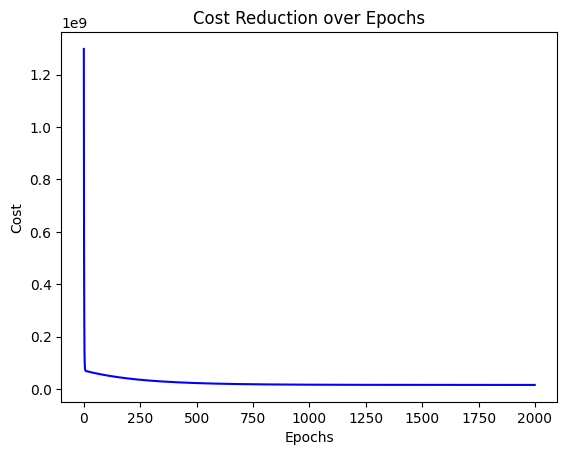

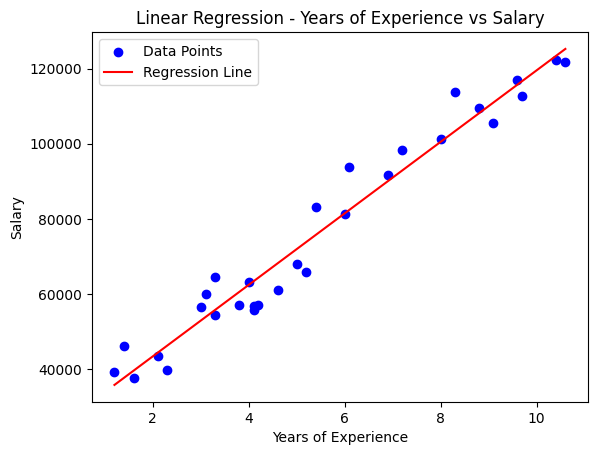

In [23]:
# Visualize the cost reduction over epochs
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction over Epochs')
plt.show()

# Plot the regression line along with data points
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, w * X + b, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - Years of Experience vs Salary')
plt.legend()
plt.show()